


```
Machine Learning Lab 01
A66
MUHAMMAD SHAHNAWAZ KHAN
21070461
```




#Aim: Implementation of Supervised Learning Algorithms from Scratch


*   Decision Tree
*   K-Nearest Neighbour
*   Naive Bias

##Problem Statement:
Download a labeled dataset (.csv)
and implement the different
supervised learning algorithms,
like Decision Tree, K-NN, Naive
Bayes. Understand the
methodologies, implementation
details, and libraries of each of the
learning algorithms. Compare the
performance of each algorithm for
the given dataset.



#Algorithms :

###Importing The Dataset and the Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def importdata():
  seattle = pd.read_csv("/content/seattle-weather.csv", sep= ',', header = None)
  print ("Dataset Length: ", len(seattle))
  print ("Dataset Shape: ", seattle.shape)
  print ("\n")
  return seattle

##1. Decision Tree



  1.   Choose the feature that best splits the dataset based on a criterion (e.g., Gini impurity, information gain).
  2.    Divide the dataset into subsets based on the chosen feature's values.
  3.  Recursively apply steps 1 and 2 to each subset until a stopping condition is met (e.g., maximum depth, minimum samples).
  4.  Assign a class label to each terminal (leaf) node based on the majority class of the instances in that node.
  5.  For a new instance, traverse the tree from the root to a leaf, and predict the majority class of the corresponding leaf.




Dataset Length:  1462
Dataset Shape:  (1462, 6)




GINI INDEX PREDICTIONS : 

['sun' 'sun' 'rain' 'sun' 'rain' 'sun' 'rain' 'sun' 'rain' 'rain' 'sun'
 'sun' 'sun' 'rain' 'sun' 'sun' 'rain' 'rain' 'sun' 'rain' 'rain' 'rain'
 'rain' 'sun' 'sun' 'rain' 'rain' 'sun' 'sun' 'sun' 'rain' 'rain' 'sun'
 'sun' 'sun' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun' 'sun'
 'rain' 'sun' 'sun' 'sun' 'sun' 'rain' 'rain' 'sun' 'rain' 'rain' 'rain'
 'rain' 'sun' 'sun' 'sun' 'sun' 'sun' 'rain' 'rain' 'rain' 'rain' 'sun'
 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun' 'rain' 'rain' 'sun'
 'rain' 'sun' 'sun' 'rain' 'rain' 'sun' 'rain' 'rain' 'sun' 'sun' 'sun'
 'sun' 'rain' 'rain' 'rain' 'rain' 'sun' 'sun' 'sun' 'rain' 'rain' 'rain'
 'sun' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun' 'rain' 'rain' 'rain' 'rain'
 'sun' 'sun' 'sun' 'rain' 'sun' 'rain' 'rain' 'sun' 'sun' 'rain' 'rain'
 'rain' 'rain' 'sun' 'sun' 'rain' 'sun' 'rain' 'rain' 'sun' 'rain' 'rain'
 'sun' 'rain' 'rain' 'sun' 'sun' 'sun' 'rain'

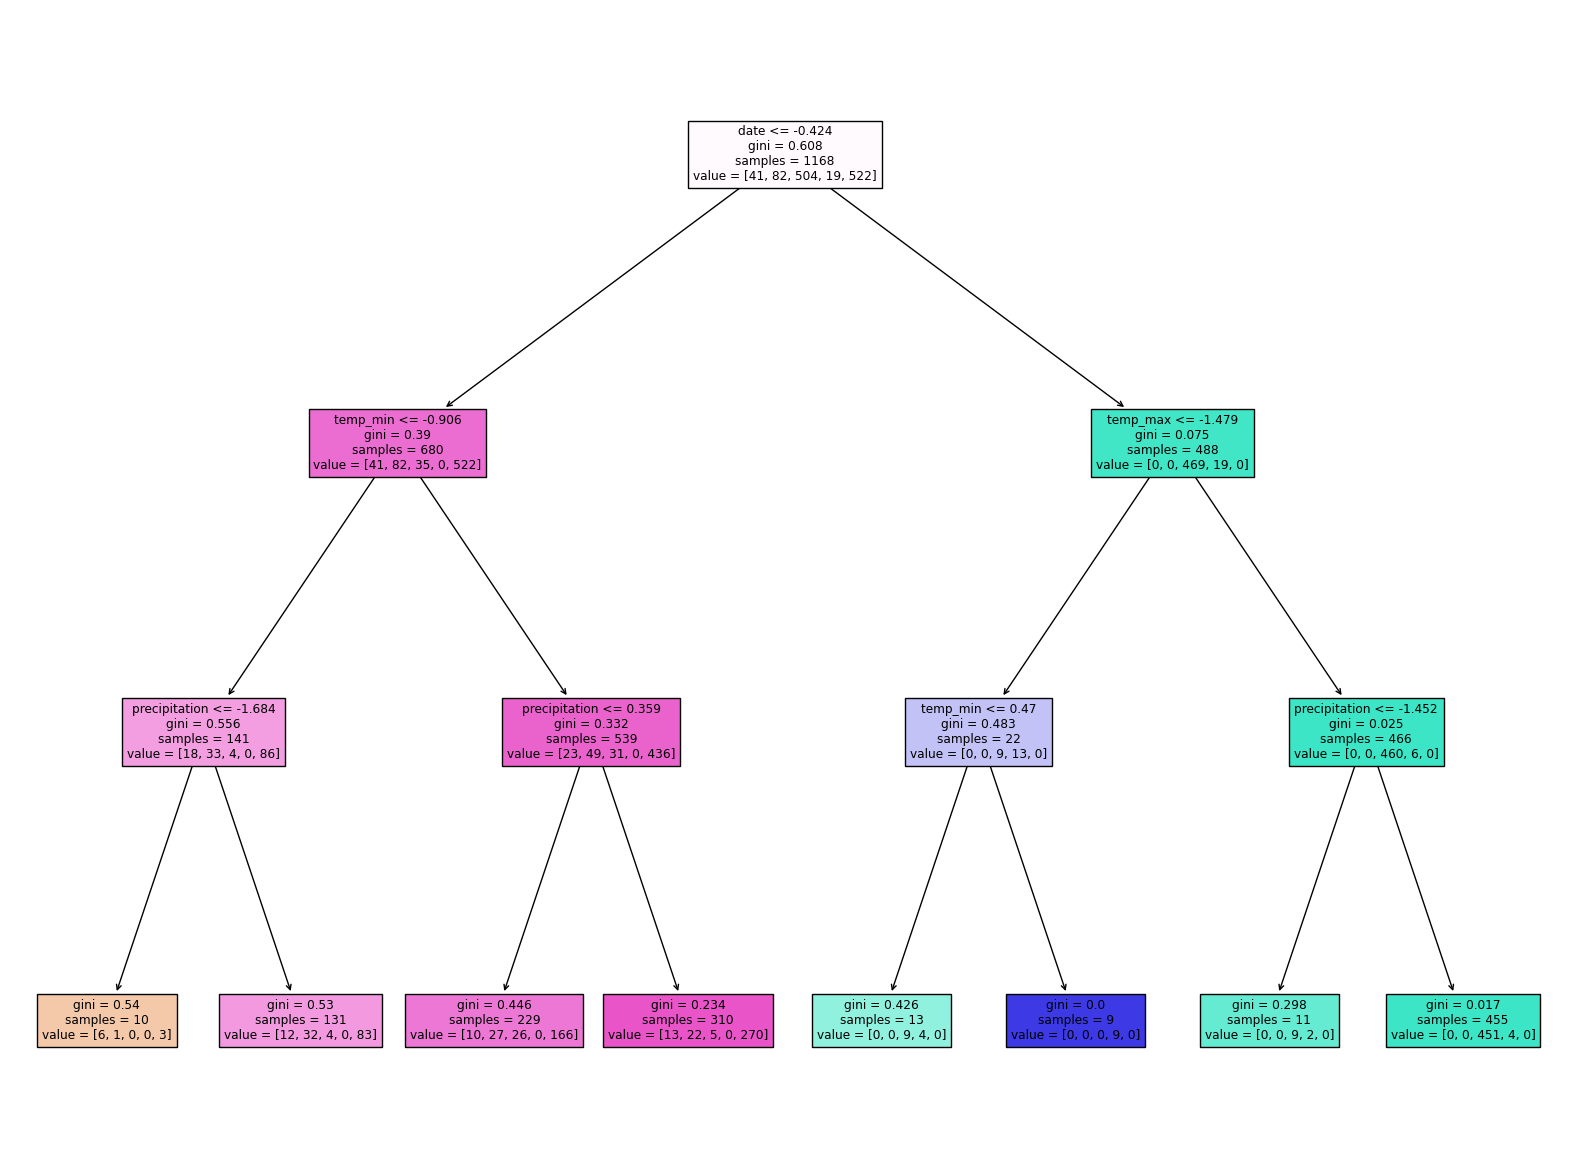

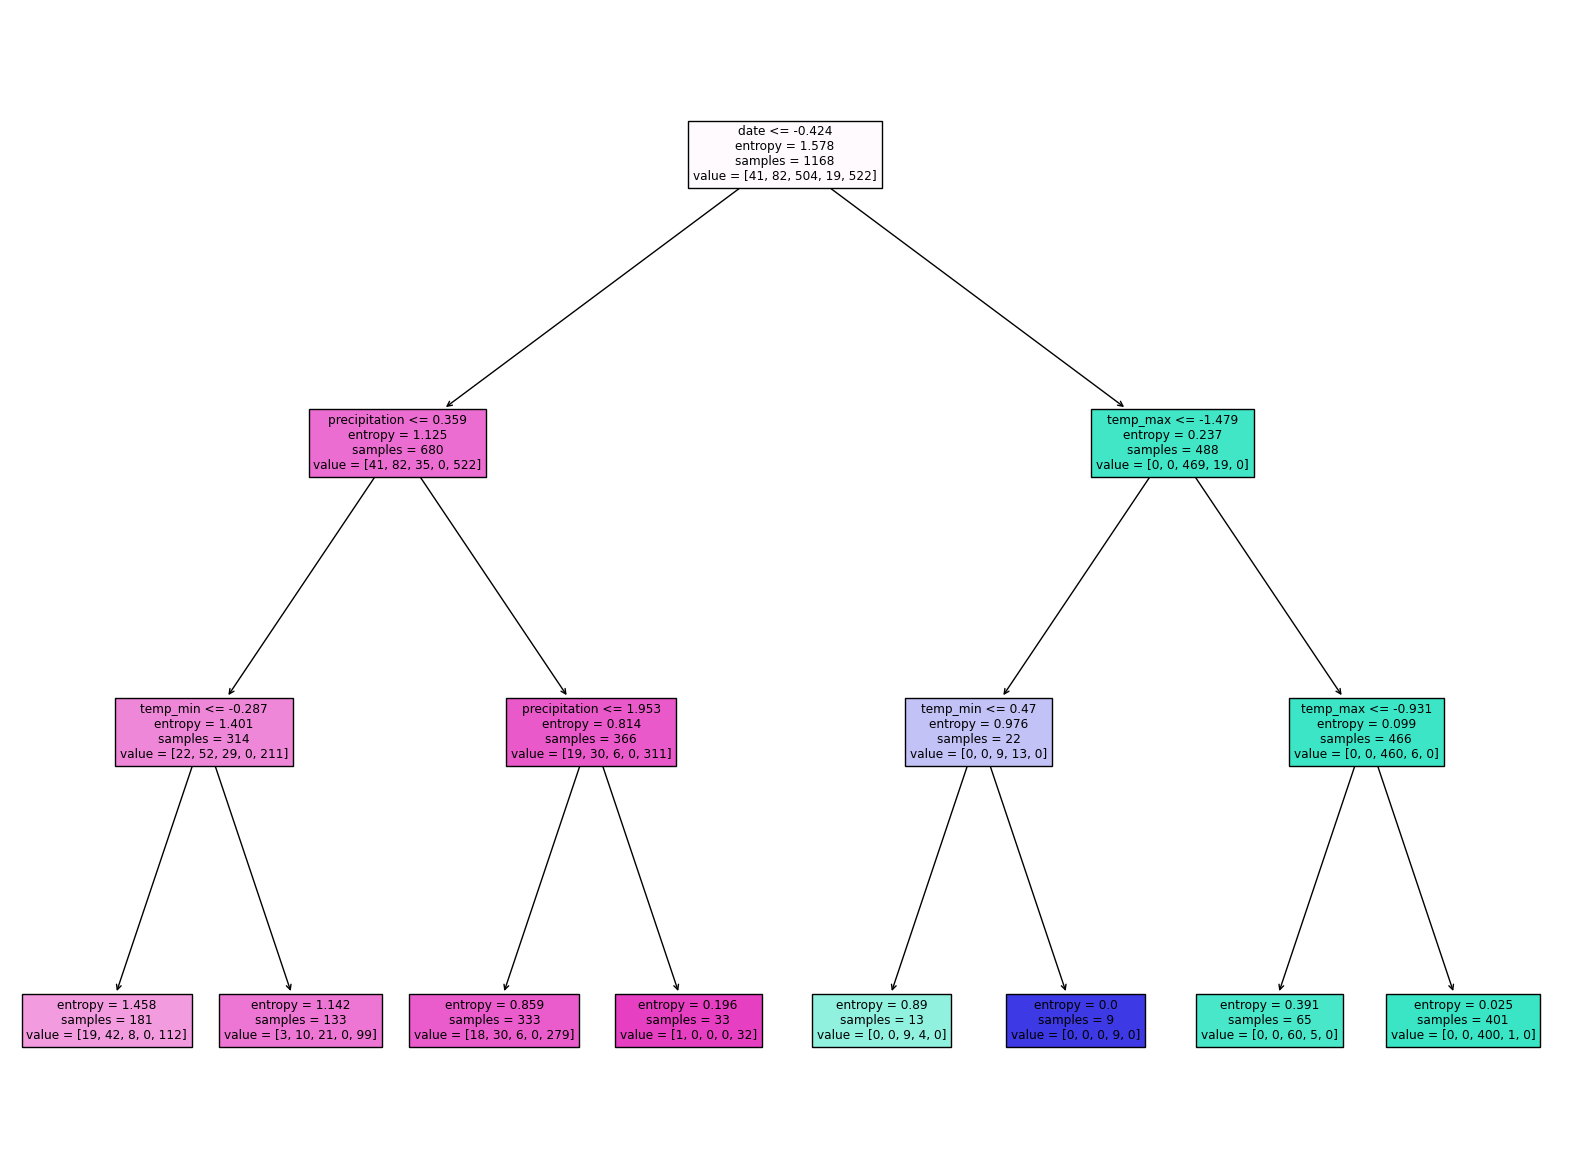

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

def splitdataset(balance_data):
  X = balance_data.values[1:, 1:5]
  Y = balance_data.values[1:, 5]
  X_train, X_test, Y_train, Y_test = train_test_split(
  X, Y, test_size=0.2)
  return X, Y, X_train, X_test, Y_train, Y_test

def standardscaler(X_train, X_test):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

def train_using_gini(X_train, X_test, Y_train, data):
  clf_gini = DecisionTreeClassifier(criterion = "gini",max_depth=3)
  clf_gini.fit(X_train, Y_train)
  plt.figure(figsize=(20,15))
  tree.plot_tree(clf_gini, feature_names=data.iloc[0], filled=True)
  return clf_gini

def train_using_entropy(X_train, X_test, Y_train, data):
  clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
  clf_entropy.fit(X_train, Y_train)
  plt.figure(figsize=(20,15))
  tree.plot_tree(clf_entropy, feature_names=data.iloc[0], filled=True)
  return clf_entropy

def prediction(X_test, clf_object):
  y_pred = clf_object.predict(X_test)
  print(y_pred)
  return y_pred


def main():
  data= importdata()
  X, Y, X_train, X_test, Y_train, Y_test = splitdataset(data)
  X_train, X_test = standardscaler(X_train, X_test)
  clf_gini = train_using_gini(X_train, X_test, Y_train, data)
  clf_entropy = train_using_entropy(X_train, X_test, Y_train, data)

  print("\n\nGINI INDEX PREDICTIONS : \n")
  y_pred_gini = prediction(X_test, clf_gini)
  cal_accuracy(Y_test, y_pred_gini)

  print("\n\nENTROPY PREDICTIONS : \n")
  y_pred_entropy = prediction(X_test, clf_entropy)
  cal_accuracy(Y_test, y_pred_entropy)


main()


##2. K-Nearest Neighbors (K-NN)

  1. Choose the number of neighbors (kk) to consider for classification.
  2. Measure the distance between the new instance and all instances in the training set (using a distance metric like Euclidean).
  3. Select the kk instances with the shortest distances to the new instance.
  4. Assign the class label by majority voting among the kk neighbors.
  5. Classify the new instance based on the determined class label.




Dataset Length:  1462
Dataset Shape:  (1462, 6)


Predicted labels for test data: ['sun' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'rain' 'rain'
 'sun' 'rain' 'rain' 'rain' 'rain' 'rain' 'sun' 'fog' 'sun' 'sun' 'sun'
 'rain' 'rain' 'rain' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun'
 'sun' 'rain' 'rain' 'sun' 'sun' 'sun' 'rain' 'rain' 'sun' 'sun' 'rain'
 'rain' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun' 'rain' 'rain' 'rain' 'rain'
 'rain' 'rain' 'sun' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun' 'rain' 'sun'
 'rain' 'sun' 'sun' 'rain' 'rain' 'sun' 'sun' 'sun' 'sun' 'sun' 'drizzle'
 'rain' 'sun' 'sun' 'sun' 'rain' 'rain' 'sun' 'fog' 'drizzle' 'sun' 'rain'
 'sun' 'rain' 'sun' 'rain' 'rain' 'sun' 'sun' 'sun' 'sun' 'sun' 'sun'
 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'rain' 'sun'
 'rain' 'sun' 'rain' 'rain' 'drizzle' 'rain' 'sun' 'rain' 'rain' 'sun'
 'rain' 'sun' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun' 'sun'
 'sun' 'rain' 'rain' 'drizzle' 'sun' 'rain' 'sun' 'sun'

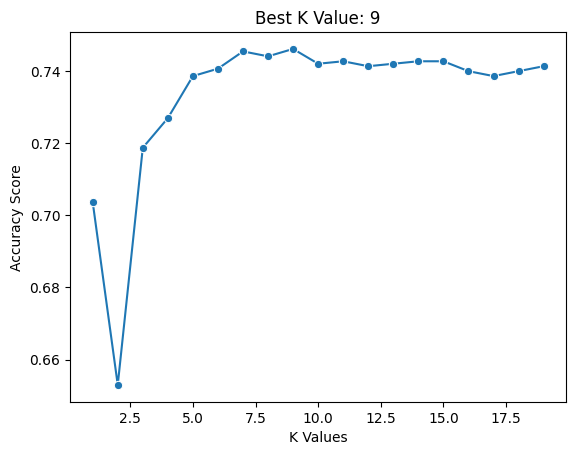

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

maternal_data = importdata()
X, Y, X_train, X_test, Y_train, Y_test = splitdataset(maternal_data)
X_train, X_test = standardscaler(X_train, X_test)
X_train, X_test = standardscaler(X_train, X_test)

k_values = list(range(1, 20))
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, Y, cv=3)
    scores.append(np.mean(score))

best_k = k_values[np.argmax(scores)]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, Y_train)

y_pred = best_knn.predict(X_test)

sb.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.title(f"Best K Value: {best_k}")

accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
classification_rep = classification_report(Y_test, y_pred)

print("Predicted labels for test data:", y_pred)
print(f"\nBest K Value: {best_k}")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n\n", conf_matrix)
print("\nClassification Report:\n\n", classification_rep)

plt.show()

##3. Naive Bayes Algorithm

  1.  Estimate the prior probabilities of each class based on the training data.
  2. Estimate the likelihood of each feature given the class, assuming feature independence.
  3. Multiply the prior probability and feature likelihoods to compute the posterior probabilities for each class.
  4. Assign the class label with the highest posterior probability as the predicted class.
  5. Apply Laplace smoothing or other smoothing techniques to handle zero probabilities and improve robustness.


In [ ]:
from sklearn.naive_bayes import GaussianNB

data = importdata()
X, Y, train, test, train_labels, test_labels = splitdataset(data)

NBclassifier = GaussianNB()
NBmodel = NBclassifier.fit(train, train_labels)
NBpreds = NBclassifier.predict(test)
print("PREDICTIONS ARE AS FOLLOWS :\n", NBpreds[:800])
print("\n ACCURACY OF NAIVE BAYES ALGORITHM IS : ", accuracy_score(test_labels, NBpreds) *100)

Dataset Length:  1462
Dataset Shape:  (1462, 6)


PREDICTIONS ARE AS FOLLOWS :
 ['rain' 'sun' 'rain' 'sun' 'sun' 'sun' 'rain' 'rain' 'rain' 'rain' 'rain'
 'sun' 'rain' 'sun' 'rain' 'rain' 'sun' 'rain' 'sun' 'rain' 'rain' 'sun'
 'rain' 'rain' 'sun' 'rain' 'sun' 'rain' 'rain' 'sun' 'sun' 'sun' 'rain'
 'sun' 'sun' 'rain' 'sun' 'rain' 'rain' 'rain' 'sun' 'sun' 'rain'
 'drizzle' 'rain' 'sun' 'rain' 'sun' 'sun' 'sun' 'rain' 'sun' 'rain' 'sun'
 'sun' 'sun' 'sun' 'sun' 'sun' 'rain' 'sun' 'rain' 'sun' 'rain' 'rain'
 'rain' 'sun' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun' 'rain' 'sun' 'sun'
 'sun' 'sun' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun' 'sun' 'rain' 'sun'
 'sun' 'sun' 'sun' 'rain' 'sun' 'sun' 'sun' 'rain' 'sun' 'sun' 'drizzle'
 'sun' 'sun' 'drizzle' 'rain' 'rain' 'rain' 'sun' 'sun' 'rain' 'rain'
 'rain' 'sun' 'rain' 'rain' 'rain' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun'
 'sun' 'sun' 'sun' 'rain' 'sun' 'rain' 'sun' 'sun' 'sun' 'snow' 'sun'
 'rain' 'sun' 'rain' 'sun' 'sun' 'sun' 'sun' 'rain' 'sun' 'sun

#Result Analysis :

Accuracy with Decision Tree : 84.64

Accuracy with KNN Algorithm: Accuracy : 74.40

Accuracy with Naive Bayes : 82.59

***Hence we can conclude that Decision Tree Algorithm has worked the best for our dataset here***

#Conclusion :

We have successfully studied and implemented supervised machine learning algorithms and also compared accuracies of various algorithms such as Decision Tree, K-Nearest Neighbor and Naive Bayes.
